In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("/kaggle/input/samplesuperstore/SampleSuperstore.csv")
df=pd.DataFrame(data)
print("o yes data is import")
df.head()

o yes data is import


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9993 non-null   object 
 1   Segment       9993 non-null   object 
 2   Country       9993 non-null   object 
 3   City          9993 non-null   object 
 4   State         9993 non-null   object 
 5   Postal Code   9993 non-null   int64  
 6   Region        9993 non-null   object 
 7   Category      9993 non-null   object 
 8   Sub-Category  9993 non-null   object 
 9   Sales         9993 non-null   float64
 10  Quantity      9993 non-null   int64  
 11  Discount      9993 non-null   float64
 12  Profit        9993 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.0+ KB


In [6]:
df.shape

(9993, 13)

In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55186.627539,229.856670,3.789753,0.156218,28.652464
std,32063.103801,623.276273,2.225149,0.206456,234.271411
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728000
50%,56301.000000,54.480000,3.000000,0.200000,8.662000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5824
Quantity          14
Discount          12
Profit          7286
dtype: int64

Region
South      241.803645
East       238.336110
West       226.488028
Central    215.772661
Name: Sales, dtype: float64


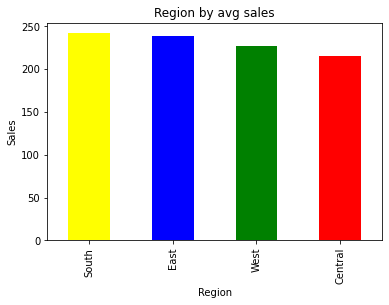

In [12]:
new_df=df.groupby(by="Region")["Sales"].mean().sort_values(ascending=False)
print(new_df)

new_df.plot(kind="bar",color=["yellow", "blue", "green", "red"])
plt.ylabel('Sales')
plt.title('Region by avg sales');

In [13]:
df.duplicated().sum()

17

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

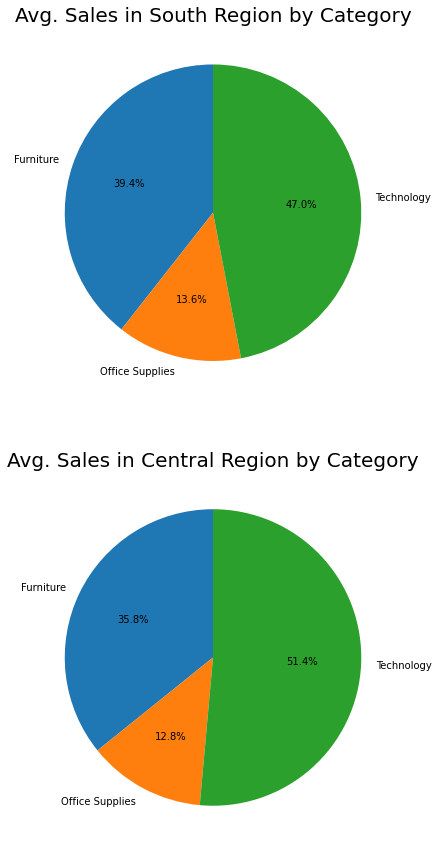

In [18]:
plt.figure(figsize=(20,15))
ax0=plt.subplot(211)
ax1=plt.subplot(212)

lowest_df=df[df['Region']=="South"] 
highest_df=df[df['Region']=='Central'] 
highest_df=highest_df.groupby(by="Category")["Sales"].mean()
lowest_df=lowest_df.groupby(by="Category")["Sales"].mean()


highest_df.plot.pie(autopct="%.1f%%",ax=ax0,startangle=90)
ax0.set_ylabel(None)
ax0.set_title('Avg. Sales in South Region by Category',size="20")
lowest_df.plot.pie(autopct="%.1f%%",ax=ax1,startangle=90)
ax1.set_ylabel(None)
ax1.set_title('Avg. Sales in Central Region by Category',size="20");

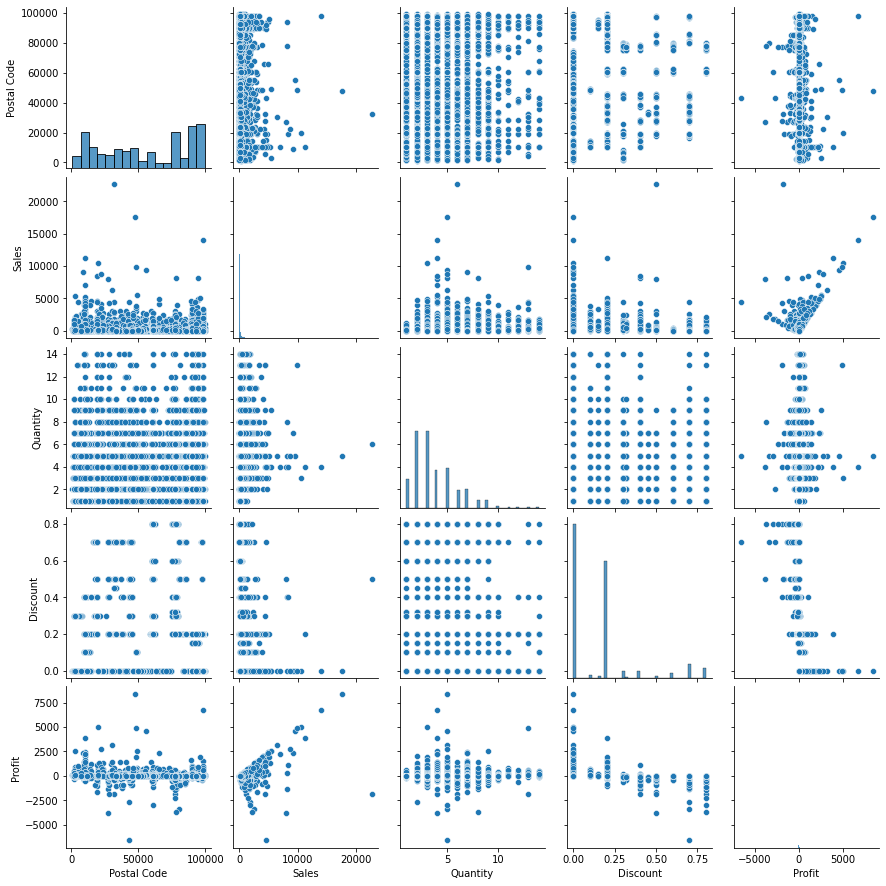

In [17]:
sns.pairplot(df)

In [19]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023480,0.013206,0.059320,-0.029917
Sales,-0.023480,1.000000,0.200730,-0.028310,0.479068
Quantity,0.013206,0.200730,1.000000,0.008618,0.066228
Discount,0.059320,-0.028310,0.008618,1.000000,-0.219654
Profit,-0.029917,0.479068,0.066228,-0.219654,1.000000


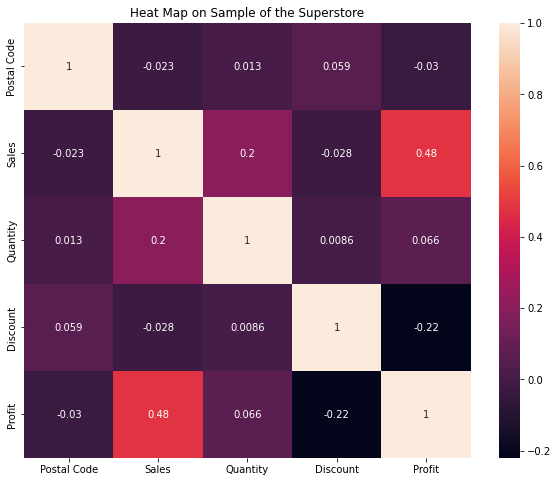

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Heat Map on Sample of the Superstore")
plt.show()

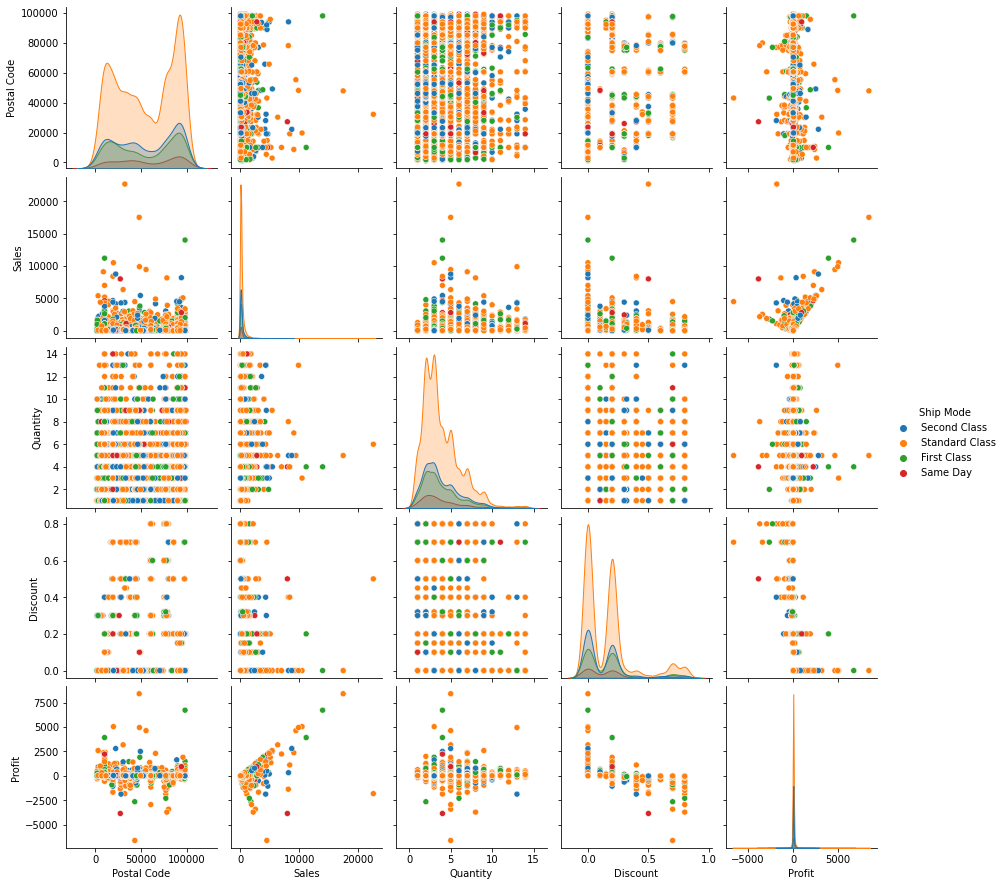

In [22]:
sns.pairplot(df, hue="Ship Mode")

In [28]:
pf_s=df.groupby("Ship Mode")[["Profit","Sales"]].sum()
pf_s

,Profit,Sales
Ship Mode,,
First Class,48953.6561,3.513805e+05
Same Day,15871.8869,1.283217e+05
Second Class,57373.7036,4.589339e+05
Standard Class,163969.2280,1.357316e+06


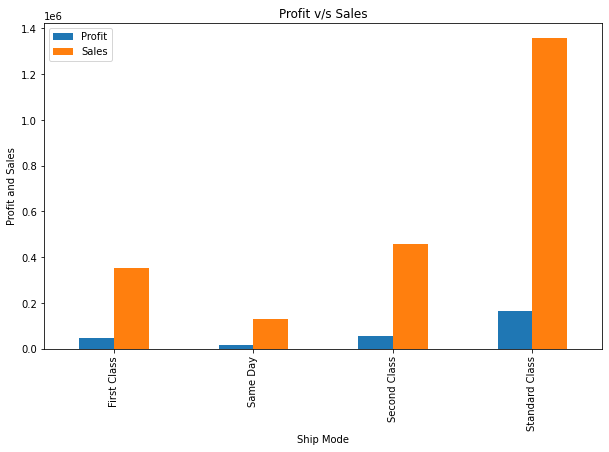

In [29]:
pf_s.plot(kind="bar", figsize=(10,6))
plt.title("Profit v/s Sales")
plt.ylabel("Profit and Sales")
plt.show()

In [27]:
c=df["Category"].value_counts()
c

Office Supplies    6011
Furniture          2118
Technology         1847
Name: Category, dtype: int64

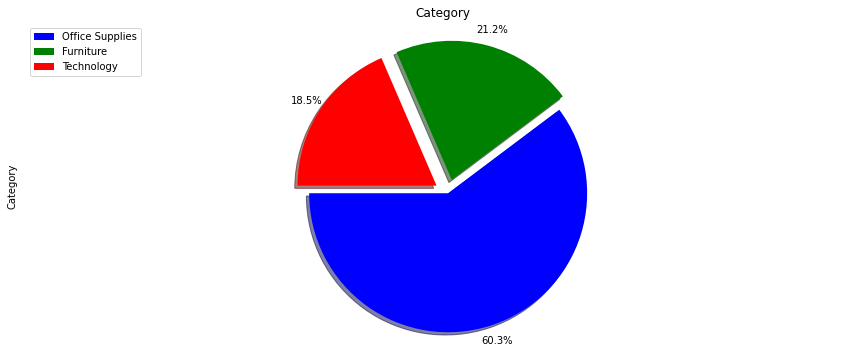

In [31]:
explode_list=[0,0.1,0.1]
colors_list=["blue","green","red"]
c.plot(kind="pie", figsize=(15,6),autopct="%1.1f%%",shadow=True, startangle=180, 
                                   explode=explode_list, labels=None, pctdistance=1.12, colors=colors_list)
plt.title("Category")
plt.axis("equal")
plt.legend(labels=c.index,loc="upper left")
plt.show()

In [33]:
cs=df.groupby("Category").Sales.sum()

cp=df.groupby("Category").Profit.sum()

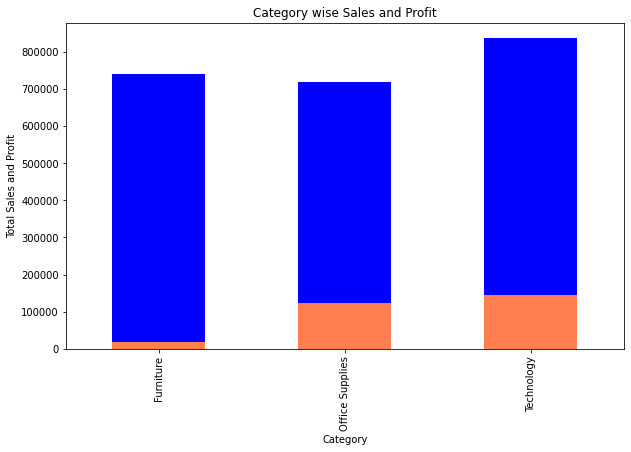

In [35]:
ax0=cs.plot(kind="bar", figsize=(10,6), color="blue")


ax0=cp.plot(kind="bar", figsize=(10,6), color="coral")

ax0.set_title("Category wise Sales and Profit")
ax0.set_ylabel("Total Sales and Profit")

plt.show()

In [36]:
sc=df["Sub-Category"].value_counts()
sc

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      465
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

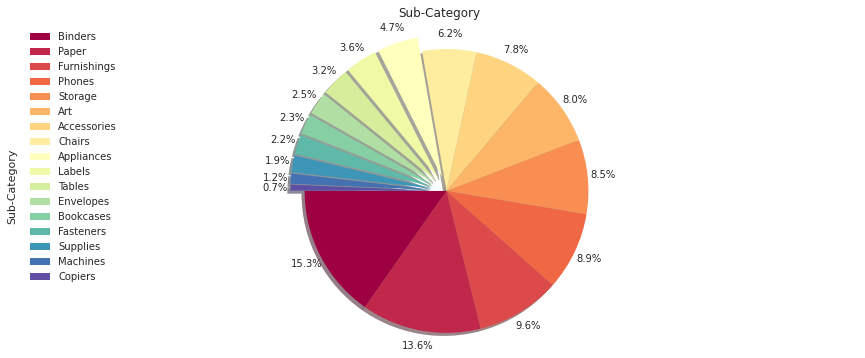

In [65]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')
explode_list=[0,0,0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
sc.plot(kind="pie", figsize=(15,6),autopct="%1.1f%%",shadow=True,startangle=180,
                                   explode=explode_list, labels=None, pctdistance=1.11,cmap=cmap)
plt.title("Sub-Category")
plt.axis("equal")
plt.legend(labels=sc.index,loc="upper left")
plt.show()

In [41]:
x=df.groupby(["Category","Sub-Category"]).Sales.sum()
y=df.groupby(["Category","Sub-Category"]).Profit.sum()

Text(0, 0.5, 'Sales')

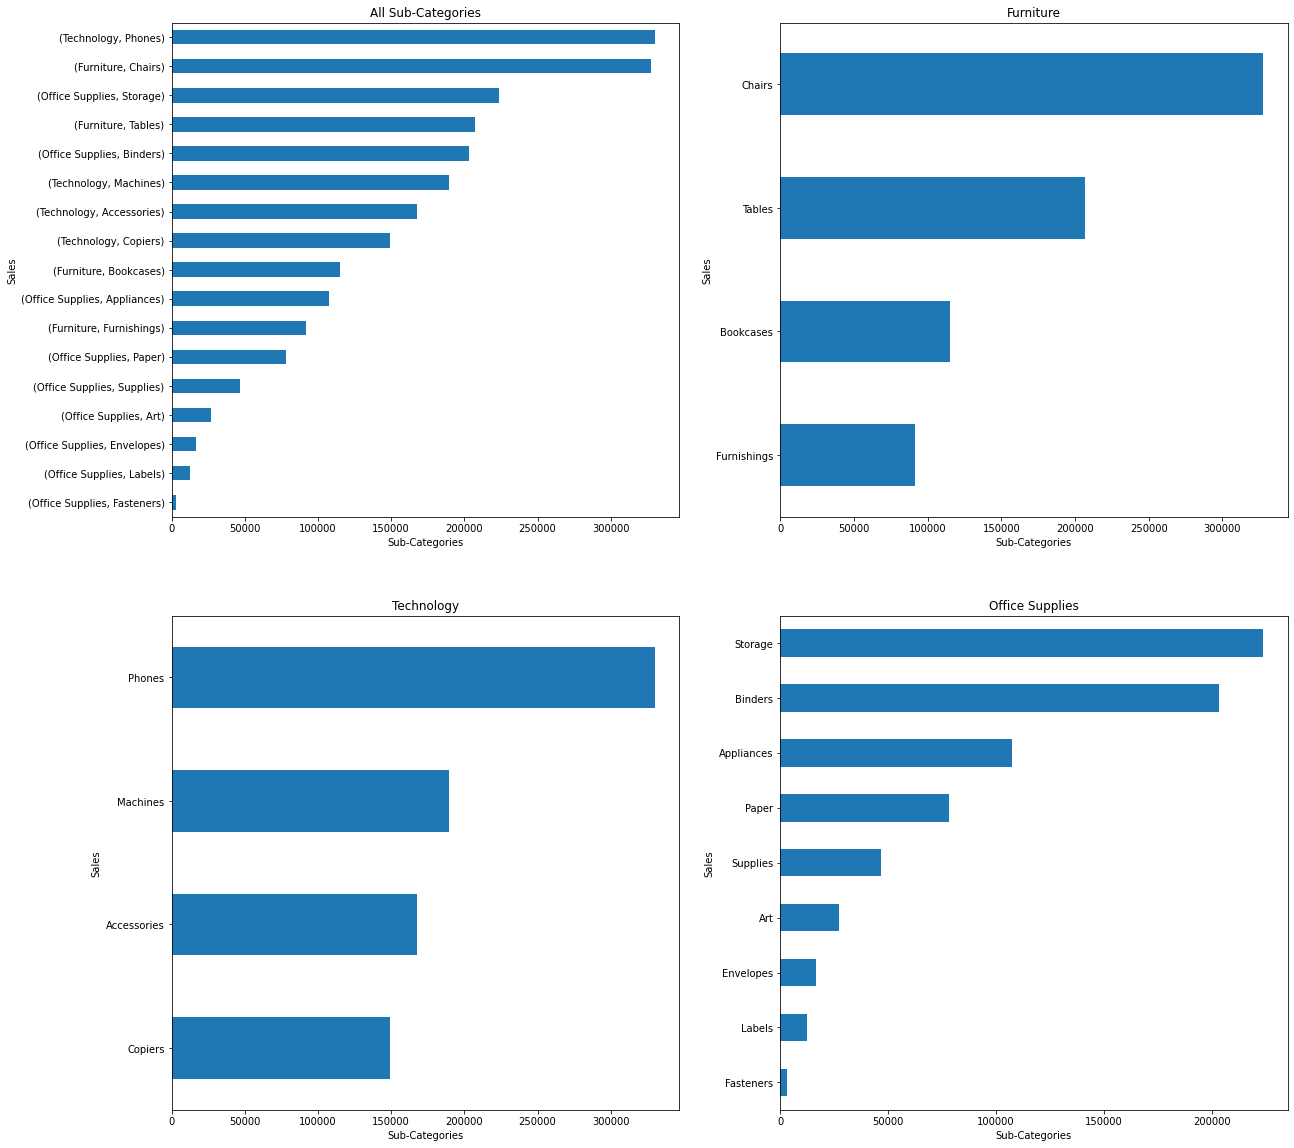

In [42]:
fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)


x["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1)
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Sales")


x["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax2)
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Sales")


x["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax3)
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Sales")


x.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax0)
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Sales")

Text(0, 0.5, 'Profit')

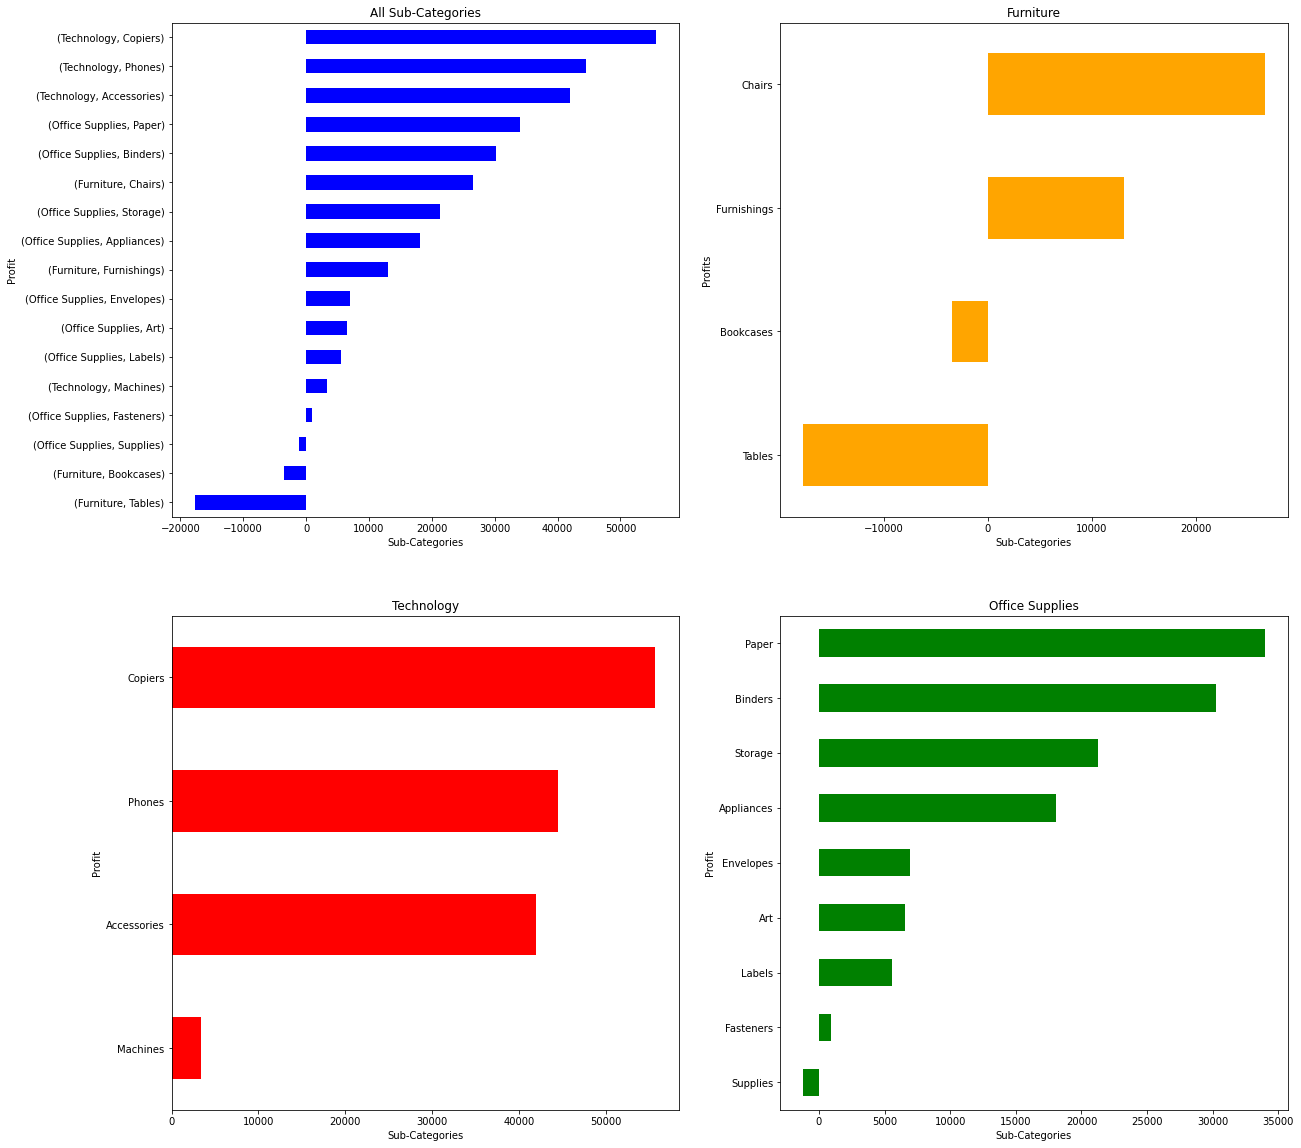

In [44]:
fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

y["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1,color="orange")
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Profits")


y["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax2,color="red")
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Profit")


y["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax3,color="green")
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Profit")


y.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax0,color="blue")
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Profit")

Text(0, 0.5, 'Profit')

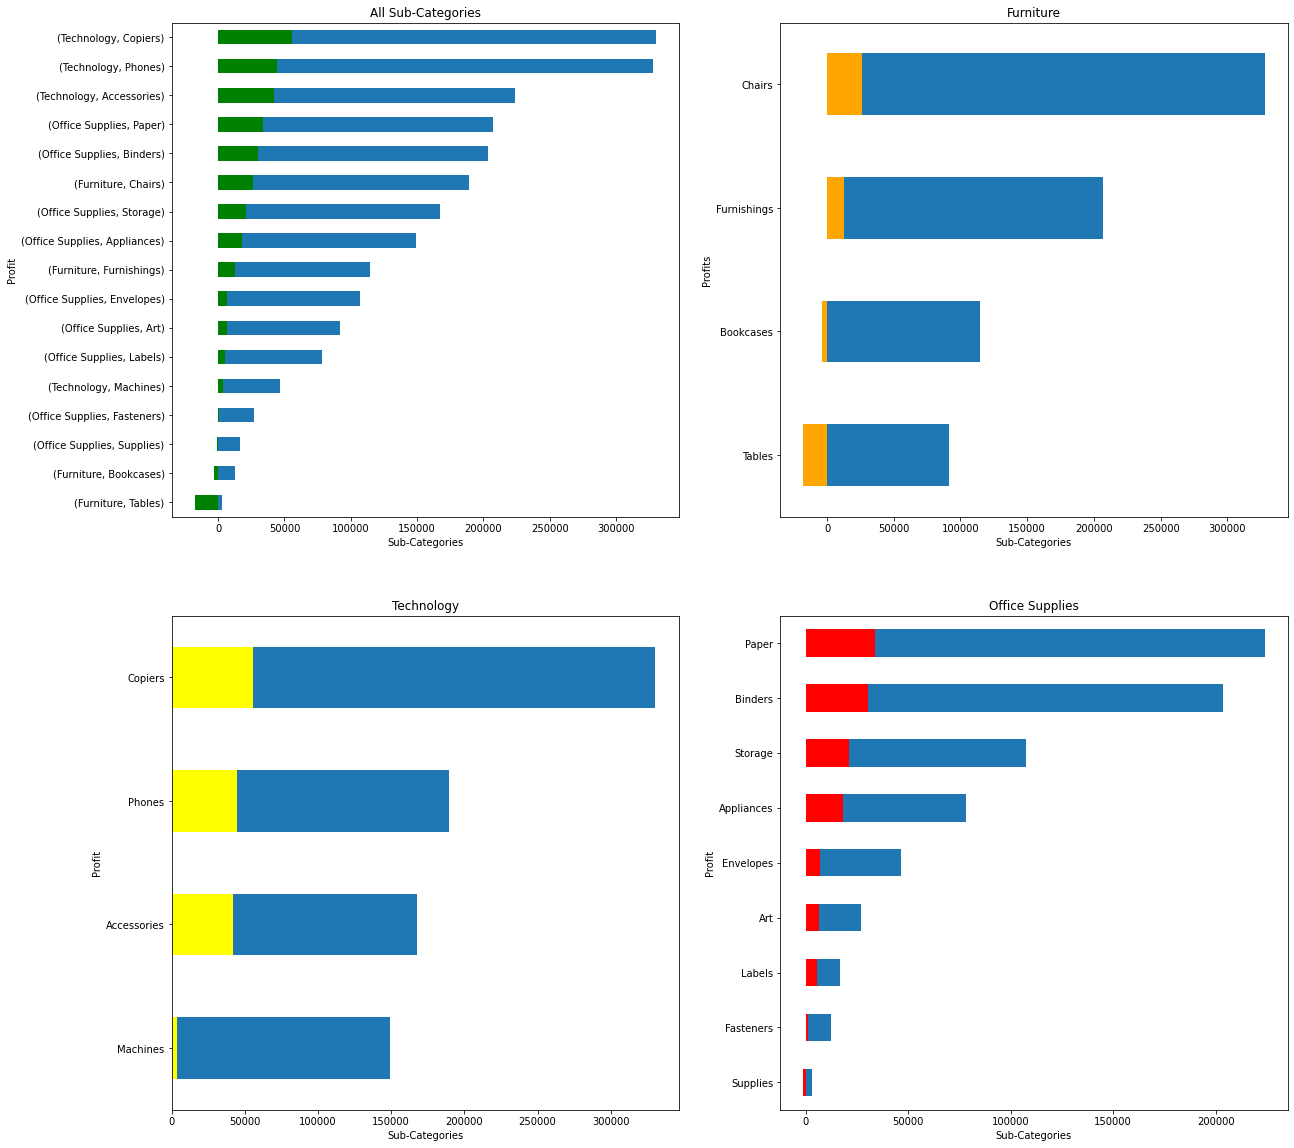

In [49]:
fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)


x["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1,)
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Sales")

#Technology
x["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax2)
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Sales")


x["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax3)
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Sales")

#Total
x.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax0)
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Sales")


y["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1,color="orange")
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Profits")


y["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax2,color="yellow")
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Profit")


y["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax3,color="red")
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Profit")


y.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax0,color="green")
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Profit")

In [50]:
st=df["State"].value_counts()
st

California              1995
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

Text(0, 0.5, 'Number of Buyers')

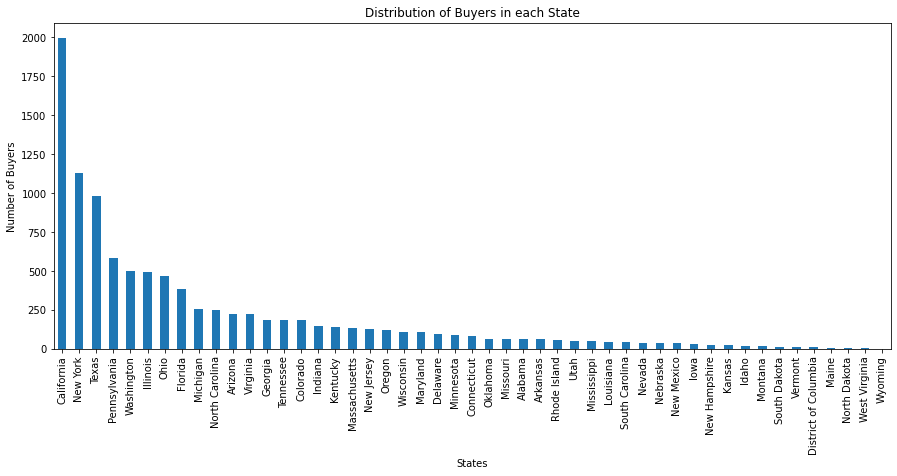

In [52]:
st.plot(kind="bar",figsize=(15,6))
plt.title("Distribution of Buyers in each State")
plt.xlabel("States")
plt.ylabel("Number of Buyers")

In [53]:
sg=df["Segment"].value_counts()
sg

Consumer       5182
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

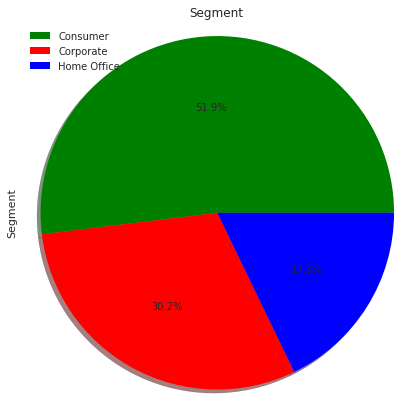

In [66]:
sg.plot(kind="pie",figsize=(7,7),autopct="%1.1f%%",
         shadow=True,labels=None,colors=["green","red","blue"])
plt.title("Segment")
plt.legend(labels=sg.index,loc="upper left")
plt.axis("equal")
plt.show()

In [61]:
df["Discount"].corr(df["Profit"])

-0.21965444093329978

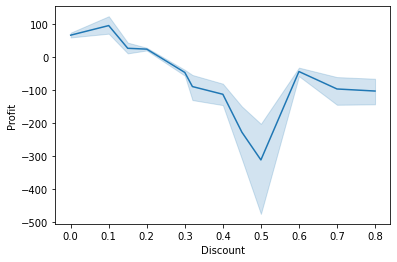

In [62]:
sns.lineplot(x="Discount",y="Profit",data=df)
plt.show()

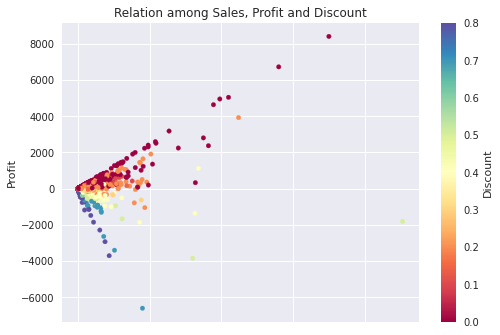

In [63]:
plt.style.use("seaborn")
df.plot(kind="scatter",x="Sales",y="Profit",c="Discount",colormap="Spectral")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Relation among Sales, Profit and Discount")
plt.show()

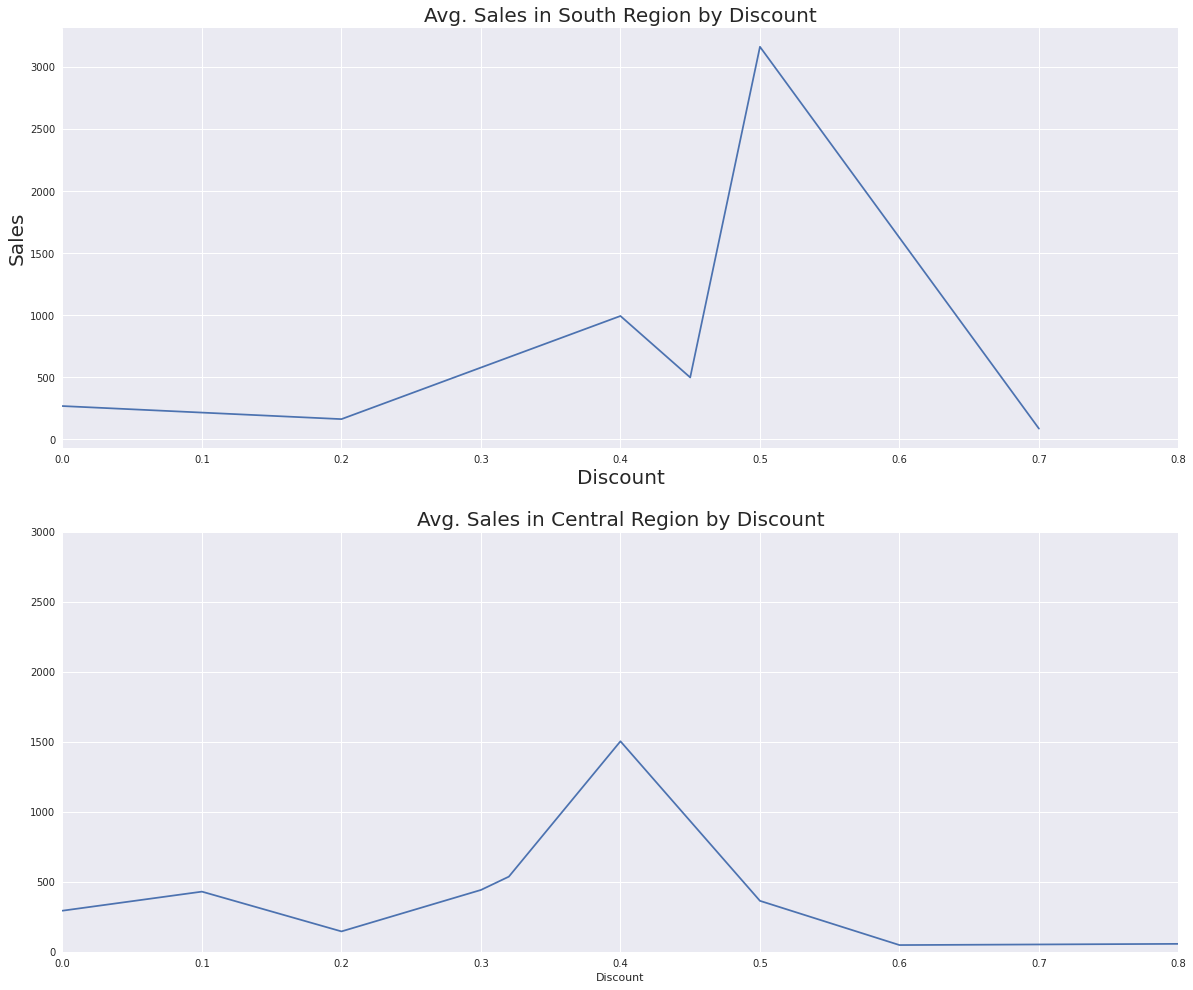

In [64]:
plt.figure(figsize=(20,17))
ax0=plt.subplot(211)
ax1=plt.subplot(212)

lowest_df=df[df['Region']=="Central"] 
highest_df=df[df['Region']=='South'] 
highest_df=highest_df.groupby(by="Discount")["Sales"].mean()
lowest_df=lowest_df.groupby(by="Discount")["Sales"].mean()


highest_df.plot(kind="line",ax=ax0)
ax0.set_xlabel('Discount',size="20")
ax0.set_ylabel('Sales',size="20")
ax0.set_xlim(0,0.8)
ax0.set_title('Avg. Sales in South Region by Discount',size="20")
lowest_df.plot(kind="line",ax=ax1)
ax1.set_title('Avg. Sales in Central Region by Discount',size="20")
ax1.set_xlim(0,0.8)
ax0.set_xlabel('Discount',size="20")
ax0.set_ylabel('Sales',size="20")
ax1.set_ylim(0,3000);